# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

from sklearn import metrics, preprocessing
from sklearn.cross_validation  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Importing data
your_local_path = "F:/kanchan/job 2019/for GIT/Boston_Housing/"
df1 = pd.read_csv (your_local_path + "boston_housing.csv")

# EDA

In [3]:
df1.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
# Exploring data , finding unique values in each column
df1.apply(lambda x : len(x.unique()))

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [6]:
# Standardization
df2 = pd.DataFrame(preprocessing.scale(df1), columns=df1.columns)
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [7]:
df2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.978968e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,-4.247810e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


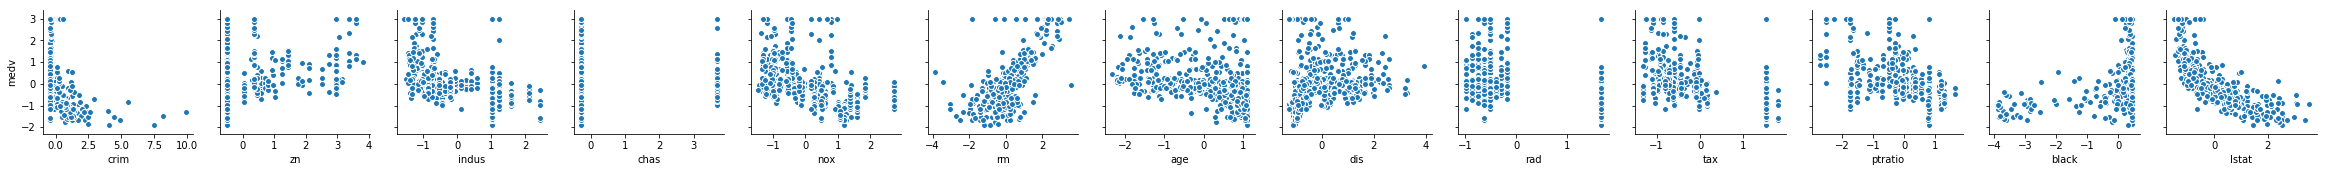

In [8]:
plt.figure(figsize=(50,50))
sns.pairplot(df2,y_vars='medv',x_vars=df2.columns[:-1])

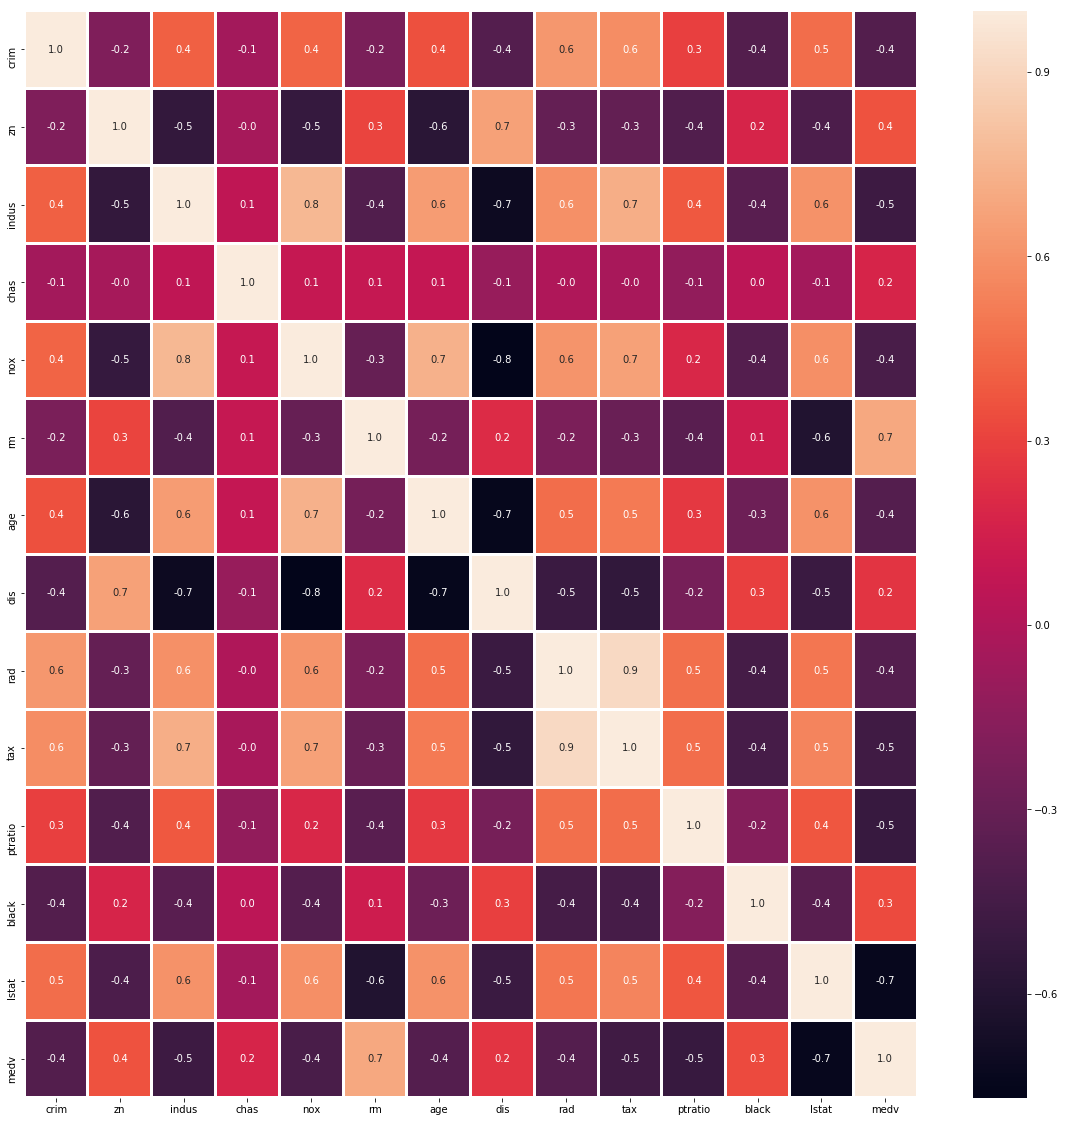

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True,fmt='.1f',linewidths=2)

# Modelling

In [10]:
def normalized_rmse(dependent_column,actual,prediction):
    result = (sqrt(metrics.mean_squared_error(actual, prediction)))/(dependent_column.max()-dependent_column.min())
    return result

In [11]:
# Defining independant and dependant variables
y=df2.medv
x=df2
x.drop(["medv"],axis=1,inplace=True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [14]:
#listing out the different ML Algorithms
models = []
#creating tupeles and initializing the algorithms
models.append(('Linear Regression', LinearRegression())) 
models.append(('Ridge Regression', Ridge(alpha = 5)))
models.append(('Lasso Regression', Lasso(alpha = 0.01)))
models.append(('Random Forest Regressor', RandomForestRegressor(max_depth = 5, min_samples_split=2, n_estimators = 10, random_state = 7)))


In [19]:
#function to run the models for the datasets
def allmodels():
    #creating dataframe
    model_list = pd.DataFrame(columns=("Model","MAE","MSE","RMSE","NMRSE"))
    #indexing
    rownumber = 0
    for name, model in models:
        regressor = model #refering the tuple
        regressor.fit(x_train, y_train)
        
        # prediction
        Y_predict = regressor.predict(x_test)
            
        #filling the dataframe
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"MAE"] = round(metrics.mean_absolute_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"MSE"]= round(metrics.mean_squared_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"RMSE"]= round(np.sqrt(metrics.mean_squared_error(y_test, Y_predict)),3)
        model_list.loc[rownumber,"NMRSE"] = round(normalized_rmse(y,y_test,Y_predict),3)
        
        #filling data to next row
          
        rownumber += 1
        #sorting the NMRSE values in ascending order
    return (model_list.sort_values(by="NMRSE",ascending=True))

In [20]:
print (allmodels())

                     Model    MAE    MSE   RMSE  NMRSE
3  Random Forest Regressor  0.266  0.145  0.381  0.078
0        Linear Regression  0.344  0.255  0.505  0.103
1         Ridge Regression  0.343  0.257  0.507  0.103
2         Lasso Regression  0.348  0.268  0.518  0.106


# Conclusion

Among all the algorithms , we have seen that Random Forest Regressor algorithm proves to be a better algorithm for this dataset as it gives the lowest RMSE value.